DAFFARA Riccardo
### USECASE N°2

#### Capacity file

In [1]:
#IMPORT
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Test to read file --> failed because problems of columns line 50
df = pd.read_csv('files_usecase2/capacities.txt', sep=';')
df.head()

ParserError: Error tokenizing data. C error: Expected 4 fields in line 50, saw 7


In [3]:
# Reading 1st line of file to get column names
col_names = pd.read_csv('files_usecase2/capacities.txt', sep=';', nrows=0).columns.tolist()
# Reading file by using column names to exclude extra problematic columns
df_capacities = pd.read_csv('files_usecase2/capacities.txt', sep=';', usecols=col_names)
df_capacities.head()

,flight_number,date,seats,pax
0,AF0000,2025-12-01,318.0,254.0
1,AF0001,2025-12-01,318.0,254.0
2,AF0002,2025-12-01,318.0,254.0
3,AF0003,2025-12-01,318.0,254.0
4,AF0004,2025-12-01,318.0,254.0


In [4]:
df_capacities.info()
# We can see a problem with 'date' column that is not of type date but object
# After checking the file, the problem is at line 85

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   flight_number  589 non-null    object 
 1   date           588 non-null    object 
 2   seats          588 non-null    float64
 3   pax            588 non-null    float64
dtypes: float64(2), object(2)
memory usage: 18.5+ KB


In [5]:
# convert 'seats' and 'pax' columns to int
df_capacities['seats'] = df_capacities['seats'].astype('Int64')
df_capacities['pax'] = df_capacities['pax'].astype('Int64')
df_capacities.info()
df_capacities.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   flight_number  589 non-null    object
 1   date           588 non-null    object
 2   seats          588 non-null    Int64 
 3   pax            588 non-null    Int64 
dtypes: Int64(2), object(2)
memory usage: 19.7+ KB


,flight_number,date,seats,pax
0,AF0000,2025-12-01,318,254
1,AF0001,2025-12-01,318,254
2,AF0002,2025-12-01,318,254
3,AF0003,2025-12-01,318,254
4,AF0004,2025-12-01,318,254


In [6]:
# print line 85
print(df_capacities.iloc[83])
# modify the written date to numeric date
df_capacities.at[83, 'date'] = '2025-12-01'
print(df_capacities.iloc[83])

# changing type to date for column 'date'
df_capacities['date'] = pd.to_datetime(df_capacities['date'])
df_capacities.info()

flight_number                    KL1013
date             monday 1 december 2025
seats                               176
pax                                 140
Name: 83, dtype: object
flight_number        KL1013
date             2025-12-01
seats                   176
pax                     140
Name: 83, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   flight_number  589 non-null    object        
 1   date           588 non-null    datetime64[ns]
 2   seats          588 non-null    Int64         
 3   pax            588 non-null    Int64         
dtypes: Int64(2), datetime64[ns](1), object(1)
memory usage: 19.7+ KB


In [7]:
# adding a new column 'load_factor' for each flight
df_capacities['load_factor'] = ((df_capacities['pax'] / df_capacities['seats']) * 100).round(1)
df_capacities.head()

,flight_number,date,seats,pax,load_factor
0,AF0000,2025-12-01,318,254,79.9
1,AF0001,2025-12-01,318,254,79.9
2,AF0002,2025-12-01,318,254,79.9
3,AF0003,2025-12-01,318,254,79.9
4,AF0004,2025-12-01,318,254,79.9


---
#### Revenue file

In [8]:
# reading the file 'revenues' ; separator is a tabulation '\t'
df_revenues = pd.read_csv('files_usecase2/revenues.bz2',
                          sep='\t')
df_revenues.head()
# file contains 3 columns ('flight number', 'flight_date' and 'revenue')

,FlightNumber,flight_date,revenue
0,AF0000,2025-12-01,258643.33
1,AF0001,2025-12-01,254822.96
2,AF0002,2025-12-01,305389.79
3,AF0003,2025-12-01,222081.39
4,AF0004,2025-12-01,198392.00


In [9]:
# changing type to date for column 'date'
df_revenues['flight_date'] = pd.to_datetime(df_revenues['flight_date'])
df_revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FlightNumber  606 non-null    object        
 1   flight_date   606 non-null    datetime64[ns]
 2   revenue       606 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.3+ KB


In [10]:
# compute the revenue for the first week of December
revenue_december_firstweek = df_revenues['revenue'].sum()
print(f"Total revenue for the first week of December is: {revenue_december_firstweek:,.2f} €")
# we can directly compute all the lines of the revenue column as the file contains only data for the first week of December.

Total revenue for the first week of December is: 105,523,274.26 €


---
#### Flight file

In [11]:
# creating the header list for the file
headers_list = ['flight_number', 'carrier', 'origin', 'destination', 'plane', 'departure_date']

# reading the file using the header list ; separator is a tabulation '\t' ; first column is the index
df_flights = pd.read_csv('files_usecase2/flights.gz',
                         sep='\t',
                         names=headers_list)
df_flights.head()

,flight_number,carrier,origin,destination,plane,departure_date
0,AF0000,AF,CDG,JFK,Boeing 787-10,-12-01
1,AF0001,AF,CDG,JFK,Boeing 787-10,-12-01
2,AF0002,AF,CDG,LAX,Boeing 787-10,-12-01
3,AF0003,AF,CDG,LAX,Boeing 787-10,-12-01
4,AF0004,AF,CDG,ORD,Boeing 787-10,-12-01


In [12]:
# adding the year to the 'departure_date' column
df_flights['departure_date'] = pd.to_datetime('2025' + df_flights['departure_date'], format='%Y-%m-%d')
df_flights.head()

,flight_number,carrier,origin,destination,plane,departure_date
0,AF0000,AF,CDG,JFK,Boeing 787-10,2025-12-01
1,AF0001,AF,CDG,JFK,Boeing 787-10,2025-12-01
2,AF0002,AF,CDG,LAX,Boeing 787-10,2025-12-01
3,AF0003,AF,CDG,LAX,Boeing 787-10,2025-12-01
4,AF0004,AF,CDG,ORD,Boeing 787-10,2025-12-01


In [17]:
# list all the different types of planes
print(f"List of the different types of planes in the file: {df_flights['plane'].unique()}")

# for better printing of the list
for i in df_flights['plane'].unique():
    print(i)

List of the different types of planes in the file: ['Boeing 787-10' 'Boeing 787-9' 'Boeing 777-200' 'Boeing 777-300'
 'Boeing 737-900' 'Boeing 737-700']
Boeing 787-10
Boeing 787-9
Boeing 777-200
Boeing 777-300
Boeing 737-900
Boeing 737-700


---
#### Merging all files

In [18]:
# merging df_flights with df_capacities
df_merged = pd.merge(df_capacities, df_revenues,
                     left_on=['flight_number', 'date'],
                     right_on=['FlightNumber', 'flight_date'],
                     how='inner')
df_merged.drop(columns=['FlightNumber', 'flight_date'], inplace=True) #dropping the columns that are not needed anymore
df_merged.head()

,flight_number,date,seats,pax,load_factor,revenue
0,AF0000,2025-12-01,318,254,79.9,258643.33
1,AF0001,2025-12-01,318,254,79.9,254822.96
2,AF0002,2025-12-01,318,254,79.9,305389.79
3,AF0003,2025-12-01,318,254,79.9,222081.39
4,AF0004,2025-12-01,318,254,79.9,198392.00


In [19]:
# merging df_merged with df_flights
df_final = pd.merge(df_merged, df_flights,
                    left_on=['flight_number', 'date'],
                    right_on=['flight_number', 'departure_date'],
                    how='inner')
df_final.drop(columns=['departure_date'], inplace=True)
df_final.head()

,flight_number,date,seats,pax,load_factor,revenue,carrier,origin,destination,plane
0,AF0000,2025-12-01,318,254,79.9,258643.33,AF,CDG,JFK,Boeing 787-10
1,AF0001,2025-12-01,318,254,79.9,254822.96,AF,CDG,JFK,Boeing 787-10
2,AF0002,2025-12-01,318,254,79.9,305389.79,AF,CDG,LAX,Boeing 787-10
3,AF0003,2025-12-01,318,254,79.9,222081.39,AF,CDG,LAX,Boeing 787-10
4,AF0004,2025-12-01,318,254,79.9,198392.00,AF,CDG,ORD,Boeing 787-10


In [25]:
# capacity of a Boeing 777-300
print(f"Capacity of a Boeing 777-300 is {df_final.loc[df_final['plane']  == 'Boeing 777-300', 'seats'].values[0]} seats.")

Capacity of a Boeing 777-300 is 381 seats.


In [28]:
# average number of passengers the first week of December between Amsterdam and New-York JFK (both directions)
avg_pax_firstweek_AMS_JFK = df_final.loc[((df_final['origin'] == 'AMS') & (df_final['destination'] == 'JFK')) | ((df_final['origin'] == 'JFK') & (df_final['destination'] == 'AMS')), 'pax'].mean().round(2)
print(f"Average number of passengers the first week of December between Amsterdam and New-York JFK (both directions) is {avg_pax_firstweek_AMS_JFK} passengers.")

Average number of passengers the first week of December between Amsterdam and New-York JFK (both directions) is 240.43 passengers.


---

In [31]:
# revenue of AF flights on the 5th of December
AF_revenue_5_Dec = df_final.loc[(df_final['carrier'] == 'AF') & (df_final['date'] == '2025-12-05'), 'revenue'].sum()
print(f"AF revenue on 5/12: {AF_revenue_5_Dec:,.2f} €")

AF revenue on 5/12: 7,199,770.55 €


In [32]:
# revenue of all KLM flights
KLM_revenue = df_final.loc[df_final['carrier'] == 'KL', 'revenue'].sum()
print(f"KLM revenue: {KLM_revenue:,.2f} €")

KLM revenue: 50,341,321.44 €


In [33]:
# revenue of all AF flights
AF_revenue = df_final.loc[df_final['carrier'] == 'AF', 'revenue'].sum()
print(f"AF revenue: {AF_revenue:,.2f} €")

AF revenue: 51,395,266.31 €


In [39]:
# sum of AF and KLM revenues
total_revenue = KLM_revenue + AF_revenue
print(f"Total revenues of AF-KLM flights: {KLM_revenue:,.2f} € + {AF_revenue:,.2f} € = {total_revenue:,.2f} €")

Total revenues of AF-KLM flights: 50,341,321.44 € + 51,395,266.31 € = 101,736,587.75 €


In [43]:
# difference between total revenue from df_revenues and revenue of all flights from df_final (AF-KLM)
print(f"{df_revenues['revenue'].sum():,.2f} € - {total_revenue.round(2):,.2f} € = {((df_revenues['revenue'].sum()) - total_revenue).round(2):,.2f} €")

# after investigation on df_revenues, there are 18 flights that are not AF nor KLM operated (DL must be Delta Arlines? Could be possible as it is also part of SkyTeam alliance.)

# let's check the revenues of these flights
# creation of a mask for AF and KLM flights
mask_af_klm = (df_revenues['FlightNumber'].str.startswith('A')) | (df_revenues['FlightNumber'].str.startswith('K'))

# filter the df_revenues using the mask
other_flights_revenues = df_revenues[~mask_af_klm]['revenue'].sum()

print(f"Other flights (non AF-KLM) revenues : {other_flights_revenues:,.2f} €")

# the values correspond

105,523,274.26 € - 101,736,587.75 € = 3,786,686.51 €
Other flights (non AF-KLM) revenues : 3,786,686.51 €


---

In [45]:
# renaming the 'load_factor' column to 'BLF'
df_final.rename(columns={'load_factor': 'BLF'}, inplace=True)
df_final.head()

,flight_number,date,seats,pax,BLF,revenue,carrier,origin,destination,plane
0,AF0000,2025-12-01,318,254,79.9,258643.33,AF,CDG,JFK,Boeing 787-10
1,AF0001,2025-12-01,318,254,79.9,254822.96,AF,CDG,JFK,Boeing 787-10
2,AF0002,2025-12-01,318,254,79.9,305389.79,AF,CDG,LAX,Boeing 787-10
3,AF0003,2025-12-01,318,254,79.9,222081.39,AF,CDG,LAX,Boeing 787-10
4,AF0004,2025-12-01,318,254,79.9,198392.00,AF,CDG,ORD,Boeing 787-10


In [28]:
# columns to keep
col_to_keep = ['flight_number', 'date', 'seats', 'pax', 'revenue', 'BLF']

df_output = df_final[col_to_keep]
df_output

,flight_number,date,seats,pax,revenue,BLF
0,AF0000,2025-12-01,318,254,258643.33,79.87
1,AF0001,2025-12-01,318,254,254822.96,79.87
2,AF0002,2025-12-01,318,254,305389.79,79.87
3,AF0003,2025-12-01,318,254,222081.39,79.87
4,AF0004,2025-12-01,318,254,198392.00,79.87
...,...,...,...,...,...,...
583,KL1009,2025-12-07,176,140,40484.97,79.55
584,KL1010,2025-12-07,132,105,33470.46,79.55
585,KL1011,2025-12-07,132,105,30850.37,79.55
586,KL1012,2025-12-07,176,140,41063.17,79.55


In [29]:
# compressed file creation

df_output.to_csv(
    'AF-KLM_flights_with_BFL.csv.gz',
    index=False,
    compression='gzip'
)
print('file created')

file created


---

In [30]:
# plot of daily revenue

# Group the data by the date part and sum the revenue
daily_revenue = df_final.groupby(df_final['date'].dt.date)['revenue'].sum().reset_index()

# Rename columns for clarity
daily_revenue.columns = ['Day', 'Total Revenue']

print(daily_revenue)

mean_daily_revenue = daily_revenue['Total Revenue'].mean()

          Day  Total Revenue
0  2025-12-01    14612080.38
1  2025-12-02    14541352.65
2  2025-12-03    14691947.44
3  2025-12-04    14101765.88
4  2025-12-05    14372690.45
5  2025-12-06    14513494.28
6  2025-12-07    14903256.67


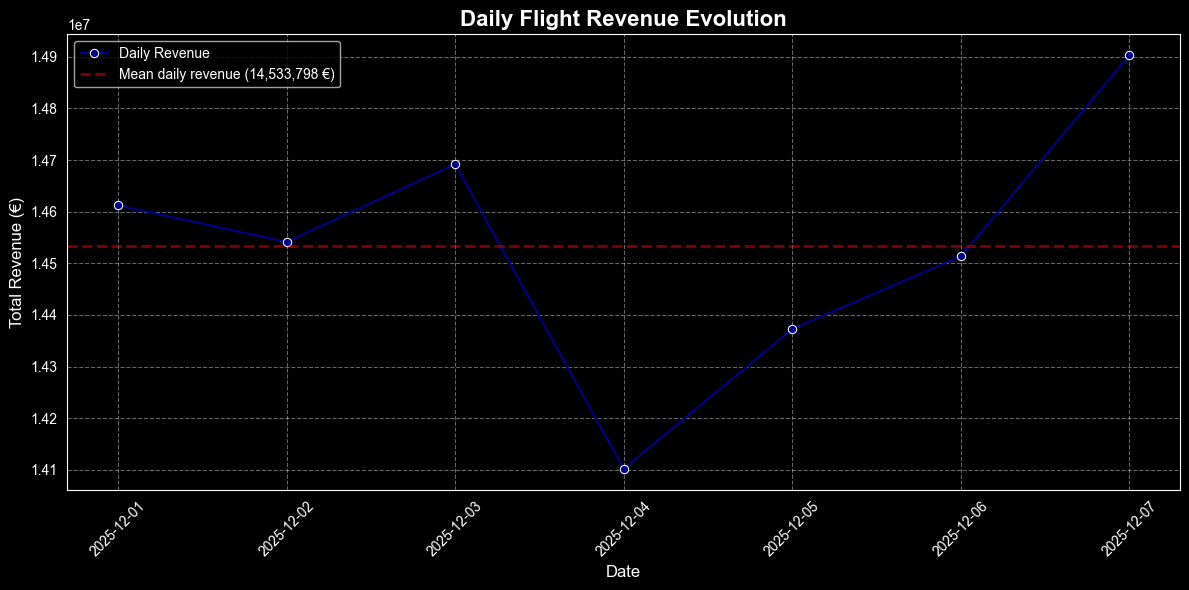

In [31]:
# set the plot size
plt.figure(figsize=(12, 6))

ax = plt.gca()

# create the line plot
sns.lineplot(
    data=daily_revenue,
    x='Day',
    y='Total Revenue',
    marker='o',
    color='darkblue',
    label='Daily Revenue',
    ax=ax
)

ax.axhline(
    y=mean_daily_revenue,
    color='red',
    linestyle='--',
    linewidth=2,
    alpha=0.5,
    label=f'Mean daily revenue ({mean_daily_revenue:,.0f} €)'
)

# titles and labels
plt.title("Daily Flight Revenue Evolution", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue (€)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()

plt.show()

---

In [47]:
# plot of revenue per route

route_revenue = df_final.groupby(['origin', 'destination'])['revenue'].sum().reset_index()
route_revenue.columns = ['Origin', 'Destination', 'Total Revenue']

# Create a single column combining Origin and Destination for ranking/plotting
route_revenue['Route'] = route_revenue['Origin'] + ' - ' + route_revenue['Destination']
print(route_revenue)

   Origin Destination  Total Revenue      Route
0     AMS         ATH      507583.97  AMS - ATH
1     AMS         BKK     3728080.07  AMS - BKK
2     AMS         BOS     3097426.81  AMS - BOS
3     AMS         CPT     3798547.95  AMS - CPT
4     AMS         DFW     2757926.33  AMS - DFW
5     AMS         DXB     3348561.93  AMS - DXB
6     AMS         FCO      545962.93  AMS - FCO
7     AMS         HKG     3906883.84  AMS - HKG
8     AMS         HND     3946570.86  AMS - HND
9     AMS         JFK     3037300.24  AMS - JFK
10    AMS         LAS     2823045.48  AMS - LAS
11    AMS         LAX     2935768.58  AMS - LAX
12    AMS         LIS      507622.57  AMS - LIS
13    AMS         MAD      543412.60  AMS - MAD
14    AMS         NCE      563620.96  AMS - NCE
15    AMS         NRT     3693322.47  AMS - NRT
16    AMS         ORD     3019339.38  AMS - ORD
17    AMS         OSL      497643.94  AMS - OSL
18    AMS         SEA     2801901.14  AMS - SEA
19    AMS         SIN     3738200.34  AM

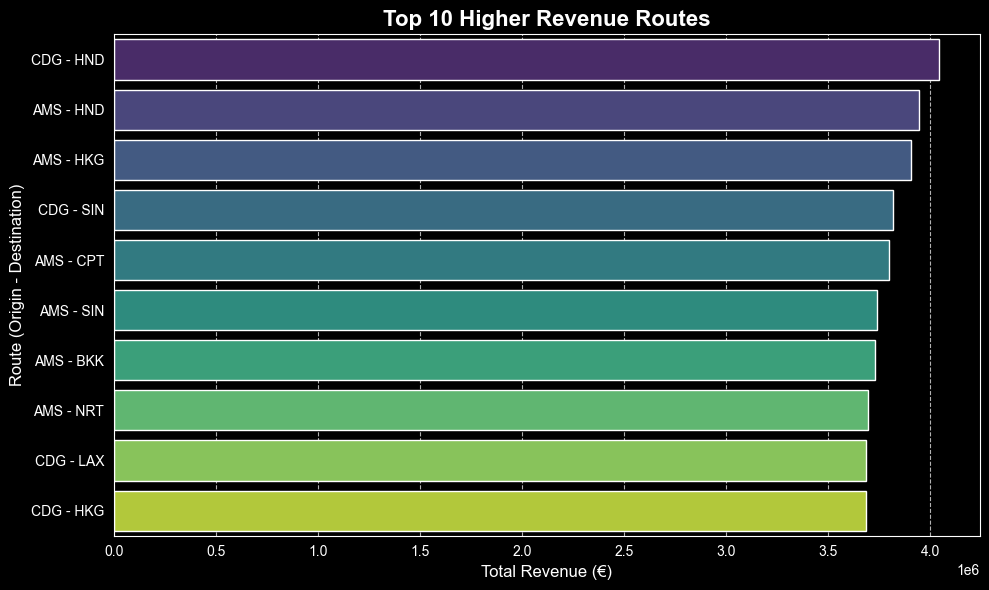

In [48]:
top_routes = route_revenue.sort_values(by='Total Revenue', ascending=False).head(10)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Total Revenue',
    y='Route',
    data=top_routes,
    hue='Route',
    palette='viridis',
)

plt.title(f"Top 10 Higher Revenue Routes", fontsize=16, fontweight='bold')
plt.xlabel("Total Revenue (€)", fontsize=12)
plt.ylabel("Route (Origin - Destination)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()